# SRA RNAseq Data
Date: 12-30-16 <br>
Author: John Vivian

In [150]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [151]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [152]:
df = pd.read_csv('SraRunInfo.csv')

In [153]:
df.head(2)

,Run,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,size_MB,AssemblyName,download_path,...,Affection_Status,Analyte_Type,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash
0,SRR5119551,2016-12-24,2016-12-19,58032007,4352400525,0,75,1238,NaN,https://sra-download.ncbi.nlm.nih.gov/srapub/S...,...,NaN,NaN,NaN,NaN,NaN,SRA505228,NaN,public,C8F35FC95F1FA73828E7D1E27DCED8D6,1EE19D5EFE2A20E9BAF59593EE983683
1,SRR5119552,2016-12-24,2016-12-19,19973392,1218376912,0,61,856,NaN,https://sra-download.ncbi.nlm.nih.gov/srapub/S...,...,NaN,NaN,NaN,NaN,NaN,SRA505228,NaN,public,69832F8A9ADE4101FBEED644C11ECDEE,5EA738BA567FA38E6F3AF73E08C7ECC4


In [154]:
print ', '.join(df.columns)

Run, ReleaseDate, LoadDate, spots, bases, spots_with_mates, avgLength, size_MB, AssemblyName, download_path, Experiment, LibraryName, LibraryStrategy, LibrarySelection, LibrarySource, LibraryLayout, InsertSize, InsertDev, Platform, Model, SRAStudy, BioProject, Study_Pubmed_id, ProjectID, Sample, BioSample, SampleType, TaxID, ScientificName, SampleName, g1k_pop_code, source, g1k_analysis_group, Subject_ID, Sex, Disease, Tumor, Affection_Status, Analyte_Type, Histological_Type, Body_Site, CenterName, Submission, dbgap_study_accession, Consent, RunHash, ReadHash


In [155]:
cols = ['Run', 'size_MB', 'BioProject', 'LibraryLayout', 'LibraryStrategy', 'Platform', 'Sex', 
    'Body_Site', 'Histological_Type', 'Tumor', 'Consent']

In [156]:
df = df[cols]

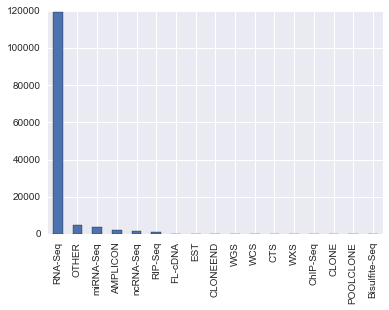

In [157]:
df['LibraryStrategy'].value_counts().plot(kind='bar');

Subset for just RNA-Seq data

In [158]:
rnaseq = df[df['LibraryStrategy'] == 'RNA-Seq']

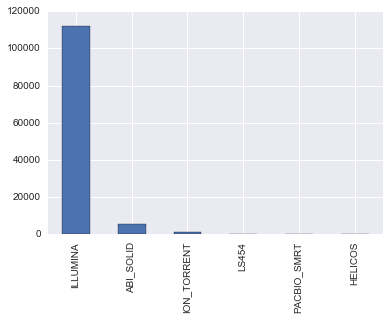

In [159]:
rnaseq['Platform'].value_counts().plot(kind='bar');

Subset for just Illumina data

In [160]:
rnaseq = rnaseq[rnaseq['Platform'] == 'ILLUMINA']

Subset for public consent

In [161]:
rnaseq = rnaseq[rnaseq.Consent == 'public']

## Stats

In [169]:
print 'Size of Dataset: {} Terabytes'.format(round(rnaseq['size_MB'].sum() * 1.0 / 1000 / 1000, 2))

Size of Dataset: 162.61 Terabytes


In [170]:
print 'Unique number of studies: ' + str(len(df['BioProject'].unique()))

Unique number of studies: 3805


In [171]:
print 'Number of samples: ' + str(len(rnaseq))

Number of samples: 112279


In [172]:
print 'Number of single-end samples: ' + str(rnaseq.LibraryLayout.value_counts().SINGLE)

Number of single-end samples: 56305


In [175]:
print 'Number of paired-end samples: ' + str(rnaseq.LibraryLayout.value_counts().PAIRED)

Number of paired-end samples: 55974


In [180]:
print 'Average Sample size: ' + str(rnaseq.size_MB.median()) + 'MB'

Average Sample size: 367.0MB


In [182]:
rnaseq[rnaseq['Run'] == 'SRR5119551'].size_MB

0    1238
Name: size_MB, dtype: int64

Make Manifest for run

In [197]:
with open('SRA-RNAseq-Manifest.tsv', 'w') as f:
    for i in xrange(len(rnaseq)):
        line = rnaseq.iloc[i]
        f.write('{}\t{}\t{}\n'.format(line.Run, line.BioProject, line.LibraryLayout))

In [206]:
len(rnaseq)

112279